---

<!-- Title and Subtitle -->
<div style="text-align: center;">
  <h1>CNN</h1>
  <h2>Exercice 2</h2>
</div>

---

<!-- Author and Date -->
<div style="text-align: center;">
  Réalisé par: DAGHMOUMI Marouan <br>
  04 Novembre 2024
</div>


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ImageNetPredictor:
    def __init__(self):
        # Chargement du modèle pré-entraîné ResNet50
        self.model = ResNet50(weights='imagenet')
        # Taille d'entrée requise pour ResNet50
        self.target_size = (224, 224)
        
    def load_and_preprocess_image(self, image_path):
        """
        Charge et prétraite une image pour la prédiction
        """
        # Chargement de l'image
        img = image.load_img(image_path, target_size=self.target_size)
        # Conversion en array
        img_array = image.img_to_array(img)
        # Expansion des dimensions pour le batch
        img_array = np.expand_dims(img_array, axis=0)
        # Prétraitement spécifique à ResNet50
        processed_img = preprocess_input(img_array)
        return img, processed_img
    
    def predict(self, image_path):
        """
        Effectue la prédiction sur une image
        """
        # Chargement et prétraitement
        original_img, processed_img = self.load_and_preprocess_image(image_path)
        
        # Prédiction
        predictions = self.model.predict(processed_img)
        
        # Décodage des prédictions (top 3)
        decoded_predictions = decode_predictions(predictions, top=3)[0]
        
        return original_img, decoded_predictions
    
    def display_predictions(self, image_path):
        """
        Affiche l'image et ses prédictions
        """
        original_img, predictions = self.predict(image_path)
        
        # Affichage de l'image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.axis('off')
        plt.title('Image originale')
        
        # Affichage des prédictions
        plt.subplot(1, 2, 2)
        y_pos = np.arange(len(predictions))
        confidences = [pred[2] * 100 for pred in predictions]
        labels = [pred[1] for pred in predictions]
        
        plt.barh(y_pos, confidences)
        plt.yticks(y_pos, labels)
        plt.xlabel('Confiance (%)')
        plt.title('Top 3 prédictions')
        
        plt.tight_layout()
        plt.show()
        
        # Affichage textuel des résultats
        print("\nRésultats détaillés:")
        for i, (id, label, score) in enumerate(predictions, 1):
            print(f"{i}. {label}: {score*100:.2f}%")



Analyse de l'image: /Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


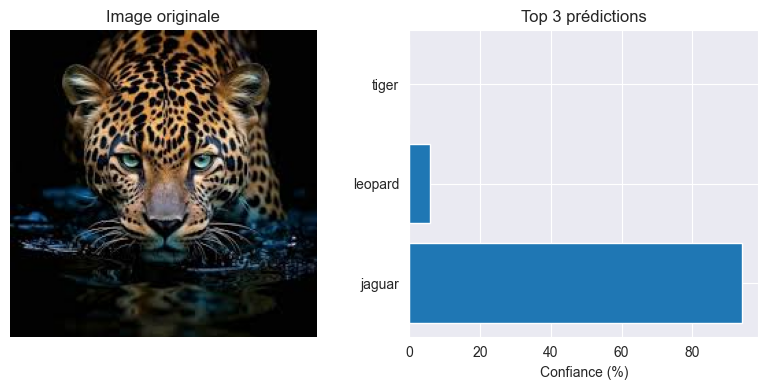


Résultats détaillés:
1. jaguar: 93.96%
2. leopard: 5.95%
3. tiger: 0.05%

Analyse de l'image: /Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


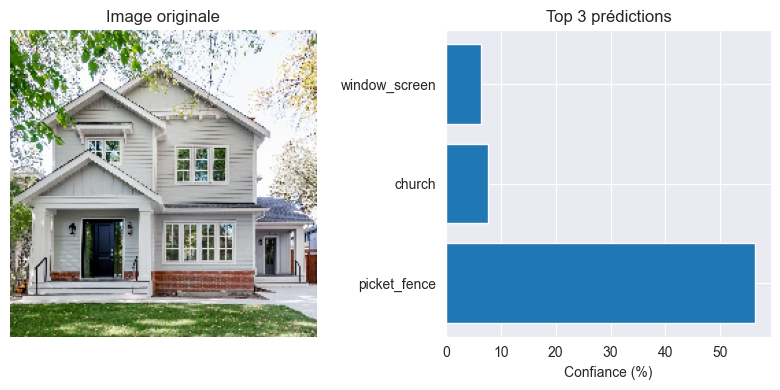


Résultats détaillés:
1. picket_fence: 56.40%
2. church: 7.74%
3. window_screen: 6.33%

Analyse de l'image: /Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


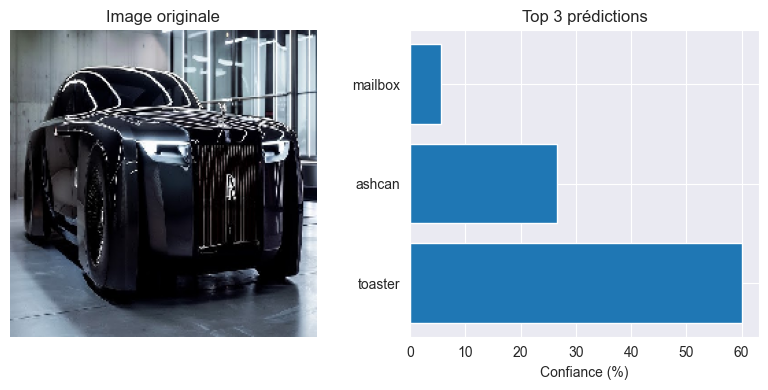


Résultats détaillés:
1. toaster: 60.10%
2. ashcan: 26.59%
3. mailbox: 5.53%


In [4]:
# Example d'utilisation
predictor = ImageNetPredictor()

# Liste des images à tester
images = [
    "/Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img.png",
    "/Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img_1.png",
    "/Users/marouandgh/IdeaProjects/Deep_learning/CNN/images/img_2.png"
]

# Prédiction pour chaque image
for img_path in images:
    print(f"\nAnalyse de l'image: {img_path}")
    predictor.display_predictions(img_path)